In [55]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import svm

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [57]:
dataset.shape

(1056, 30)

In [58]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [59]:
x.shape

(1056, 29)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state =47, shuffle=True)

In [61]:
x_train.shape

(844, 29)

In [62]:
x_test.shape

(212, 29)

In [63]:
# scealing is required for indepandent variables at ANN
from sklearn.preprocessing import StandardScaler

In [64]:
scale = StandardScaler()

In [65]:
X = scale.fit_transform(x)
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

In [66]:
regressor = svm.SVR(kernel='rbf',
    degree=1,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=8,
    epsilon=0.1,)

In [67]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [68]:
 regressor.fit(X_train, y_train)

SVR(C=8, degree=1, gamma='auto')

In [69]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:05.031000


In [70]:
# compute the testing accuracy
y_pred = regressor.predict(X_test)

In [71]:
y_pred_train = regressor.predict(X_train)

In [72]:
y_pred_train.shape

(844,)

In [73]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [74]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [75]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.1864648023896102
MSE is 0.06230084604756268
R2 score is 0.7613731237901692


In [76]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [77]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.13183237770293804
MSE is 0.03914877601572655
R2 score is 0.8304843218141225


In [78]:
cvscoretra = (cross_val_score(regressor,X_train,y_train.ravel(),cv=5).mean())

In [79]:
print("The CV score for val set")
print("--------------------------------------")
print (cross_val_score(regressor,X_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretra))

The CV score for val set
--------------------------------------
[0.51972639 0.49851354 0.63680051 0.40606702 0.52001922]
Q2 is 0.5162253351922554


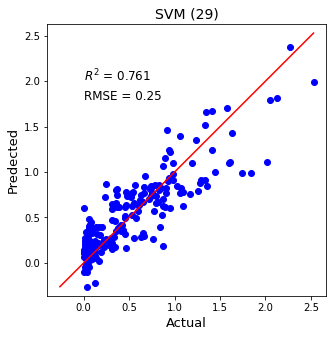

In [80]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.761', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.25', fontsize = 12)
plt.title('SVM (29)', fontsize = 14)
plt.show()

In [81]:
import statsmodels.api as sm

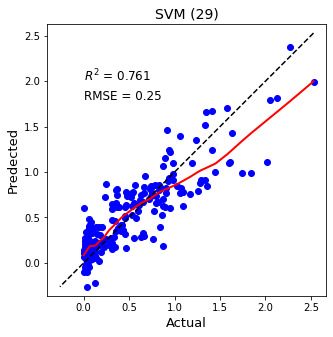

In [82]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.761', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.25', fontsize = 12)
plt.title('SVM (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

In [ ]:
svm.SVR??

In [ ]:
# creatting parameter gride
param_grid_regressor = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                        'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 15, 20, 25, 50, 100,150,200], 
                        'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 1, 2, 4, 6, 10, 15, 20], 'degree' : [1,2,3,4,5,6, 7, 8]}

In [ ]:
print (param_grid_regressor)              

In [ ]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [ ]:
regressor_random.fit (X_train,y_train)

In [ ]:
regressor_random.best_params_

In [ ]:
regressor_random.best_score_

In [ ]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_regressor1 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                        'gamma': ['scale', 'auto'], 'C': [ 150,  200,  250, 300, 350], 
                        'epsilon': [ 0.4, 0.5, 0.6, 0.7], 'degree' : [2, 3, 4, 5]}

In [ ]:
param_grid_regressor1

In [ ]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor1,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

In [ ]:
regressor_grid.fit(X_train, y_train)

In [ ]:
regressor_grid.best_params_

In [ ]:
regressor_grid.best_score_